In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bitcion-historical-data.csv', sep=";")
df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-11-18T00:00:00.000Z,2024-11-18T23:59:59.999Z,2024-11-18T16:03:00.000Z,2024-11-18T14:00:00.000Z,2781,89843.715479,92596.788919,89393.590574,90542.643996,7.553578e+10,1.791256e+12,2024-11-18T23:59:59.999Z
1,2024-11-17T00:00:00.000Z,2024-11-17T23:59:59.999Z,2024-11-17T09:11:00.000Z,2024-11-17T22:06:00.000Z,2781,90558.463112,91433.040503,88741.665832,89845.851209,4.635016e+10,1.777526e+12,2024-11-17T23:59:59.999Z
2,2024-11-16T00:00:00.000Z,2024-11-16T23:59:59.999Z,2024-11-16T05:26:00.000Z,2024-11-16T15:51:00.000Z,2781,91064.366226,91763.947884,90094.225369,90558.475236,4.433319e+10,1.791536e+12,2024-11-16T23:59:59.999Z
3,2024-11-15T00:00:00.000Z,2024-11-15T23:59:59.999Z,2024-11-15T22:03:00.000Z,2024-11-15T04:52:00.000Z,2781,87284.183098,91868.744436,87124.900860,91066.006955,7.824311e+10,1.801436e+12,2024-11-15T23:59:59.999Z
4,2024-11-14T00:00:00.000Z,2024-11-14T23:59:59.999Z,2024-11-14T14:34:00.000Z,2024-11-14T23:42:00.000Z,2781,90574.882055,91765.221369,86682.815823,87250.431275,8.761671e+10,1.727562e+12,2024-11-14T23:59:59.999Z


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timeOpen      399 non-null    object 
 1   timeClose     399 non-null    object 
 2   timeHigh      399 non-null    object 
 3   timeLow       399 non-null    object 
 4   name          399 non-null    int64  
 5   open          399 non-null    float64
 6   high          399 non-null    float64
 7   low           399 non-null    float64
 8   close         399 non-null    float64
 9   volume        399 non-null    float64
 10  marketCap     399 non-null    float64
 11  timestamp     399 non-null    object 
 12  daily_return  399 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 40.7+ KB


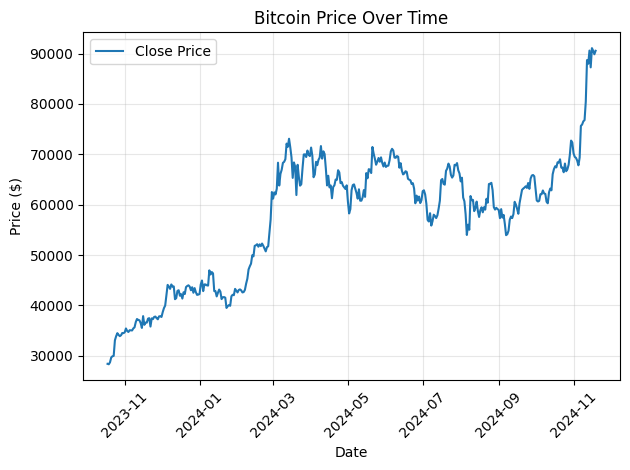

In [16]:
df['timestamp_converted'] = pd.to_datetime(df['timestamp'])
plt.figure()
plt.plot(df['timestamp_converted'], df['close'], label='Close Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Calculate daily return
df['daily_return'] = ((df['close']-df['open'])/df['open'])
df['daily_return'].head()

0    0.007779
1   -0.007869
2   -0.005555
3    0.043328
4   -0.036704
Name: daily_return, dtype: float64

In [18]:
df['daily_return_pct'] = df['daily_return'] * 100
df['daily_return_pct'].head()

0    0.777938
1   -0.786908
2   -0.555531
3    4.332771
4   -3.670389
Name: daily_return_pct, dtype: float64

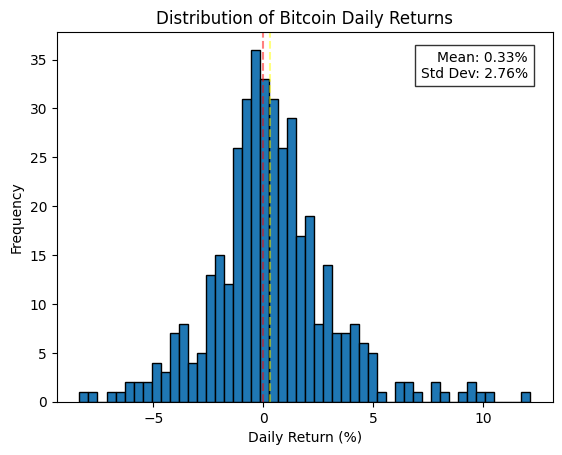

In [29]:
# Create histogram
plt.figure()
plt.hist(df['daily_return_pct'], bins=50, edgecolor='black')
plt.title('Distribution of Bitcoin Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')

mean_return = df['daily_return_pct'].mean()
std_return = df['daily_return_pct'].std()

# Add vertical line at 0% return and mean return
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=mean_return, color='yellow', linestyle='--', alpha=0.5)

# Show mean return and standard deviation as text
plt.text(0.95, 0.95, f'Mean: {mean_return:.2f}%\nStd Dev: {std_return:.2f}%', 
        transform=plt.gca().transAxes, 
        horizontalalignment='right',
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8))

plt.show()